In [ ]:
!unzip Z.zip -d 'Set A'
!unzip O.zip -d 'Set B'
!unzip N.zip -d 'Set C'
!unzip F.zip -d 'Set D'
!unzip S.zip -d 'Set E'

Archive:  Z.zip
  inflating: Set A/Z092.txt          
  inflating: Set A/Z002.txt          
  inflating: Set A/Z003.txt          
  inflating: Set A/Z004.txt          
  inflating: Set A/Z005.txt          
  inflating: Set A/Z006.txt          
  inflating: Set A/Z007.txt          
  inflating: Set A/Z008.txt          
  inflating: Set A/Z009.txt          
  inflating: Set A/Z010.txt          
  inflating: Set A/Z011.txt          
  inflating: Set A/Z012.txt          
  inflating: Set A/Z013.txt          
  inflating: Set A/Z014.txt          
  inflating: Set A/Z015.txt          
  inflating: Set A/Z016.txt          
  inflating: Set A/Z017.txt          
  inflating: Set A/Z018.txt          
  inflating: Set A/Z019.txt          
  inflating: Set A/Z020.txt          
  inflating: Set A/Z021.txt          
  inflating: Set A/Z022.txt          
  inflating: Set A/Z023.txt          
  inflating: Set A/Z024.txt          
  inflating: Set A/Z025.txt          
  inflating: Set A/Z026.txt       

# Import Dataset

In [ ]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
GColab = False

if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

DATA_DIR_A = '/content/Set A/'
DATA_DIR_B = '/content/Set B/'
DATA_DIR_C = '/content/Set C/'
DATA_DIR_D = '/content/Set D/'
DATA_DIR_E = '/content/Set E/'

  
LABEL_C1 = 0
LABEL_C2 = 1
LABEL_C3 = 2

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(LABEL_C1)])
        nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_B)):
     #   img = np.loadtxt(DATA_DIR_B + fname)
      #  data.append([img, np.array(LABEL_C1)])
       # nbFiles+=1    
    
    for fname in tqdm(os.listdir(DATA_DIR_C)):
        img = np.loadtxt(DATA_DIR_C + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_D)):
        img = np.loadtxt(DATA_DIR_D + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data), "Files")

100%|██████████| 100/100 [00:01<00:00, 75.19it/s]

400 Files


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
nb_epoch = 20
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
64/64 [==============================] - 80s 976ms/step - loss: 0.8058 - mae: 0.5064 - acc: 0.5117 - val_loss: 0.6183 - val_mae: 0.4136 - val_acc: 0.7031
Epoch 2/20
64/64 [==============================] - 61s 960ms/step - loss: 0.592

dict_keys(['loss', 'mae', 'acc', 'val_loss', 'val_mae', 'val_acc'])


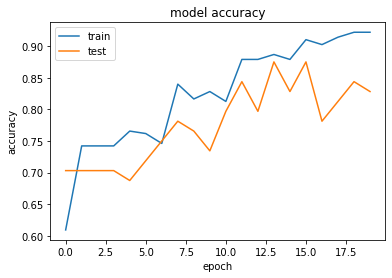

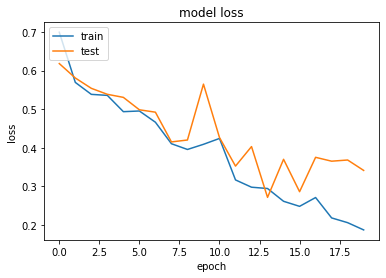

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

20/20 [==============================] - 4s 204ms/step - loss: 0.3811 - mae: 0.1991 - acc: 0.8375


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
import numpy as np
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (320, 4097, 1)
Test shape:  (80, 4097, 1)


In [ ]:
import tensorflow as tf
clf = tf.keras.models.Sequential()

# CNN

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
clf.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
clf.add(Dropout(0.5))
#Flatten the output
clf.add(Flatten())
#Add a dense layer with 512 neurons
clf.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
clf.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
clf.add(Dense(units = 2, activation='softmax'))
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4097, 32)          192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2049, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2049, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 262272)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
10/10 [==============================] - 22s 2s/step - loss: 308.6800 - accuracy: 0.6187
Epoch 2/20
10/10 [==============================] - 18s 2s/step - loss: 62.9549 - accuracy: 0.6438
Epoch 3/20
10/10 [==============================] - 18s 2s/step - loss: 17.3253 - accuracy: 0.7250
Epoch 4/20
10/10 [==============================] - 18s 2s/step - loss: 7.6501 - accuracy: 0.6344
Epoch 5/20
10/10 [==============================] - 18s 2s/step - loss: 1.6787 - accuracy: 0.6000
Epoch 6/20
10/10 [==============================] - 18s 2s/step - loss: 0.3202 - accuracy: 0.8750
Epoch 7/20
10/10 [==============================] - 18s 2s/step - loss: 0.1146 - accuracy: 0.9750
Epoch 8/20
10/10 [==============================] - 18s 2s/step - loss: 0.0558 - accuracy: 0.9844
Epoch 9/20
10/10 [==============================] - 18s 2s/step - loss: 0.0264 - accuracy: 0.9937
Epoch 10/20
10/10 [==============================] - 18s 2s/step - loss: 0.0070 - accuracy: 1.0000
Epoch 11/20
10/

In [ ]:
score = clf.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 304ms/step - loss: 0.6387 - accuracy: 0.8625


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
model.add(Dropout(0.5))
#Flatten the output
model.add(Flatten())
#Add a dense layer with 512 neurons
model.add(Dense(units = 16, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 1024 neurons
model.add(Dense(units = 32, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
model.add(Dense(units = 2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4097, 13)          2093      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4097, 128)         8448      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2049, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2049, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262272)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
10/10 [==============================] - 9s 789ms/step - loss: 25.4279 - accuracy: 0.6625
Epoch 2/20
10/10 [==============================] - 8s 774ms/step - loss: 2.6649 - accuracy: 0.6531
Epoch 3/20
10/10 [==============================] - 8s 768ms/step - loss: 0.9029 - accuracy: 0.7219
Epoch 4/20
10/10 [==============================] - 8s 768ms/step - loss: 0.6379 - accuracy: 0.7750
Epoch 5/20
10/10 [==============================] - 8s 768ms/step - loss: 0.2783 - accuracy: 0.9062
Epoch 6/20
10/10 [==============================] - 8s 758ms/step - loss: 0.2345 - accuracy: 0.9062
Epoch 7/20
10/10 [==============================] - 8s 771ms/step - loss: 0.1382 - accuracy: 0.9688
Epoch 8/20
10/10 [==============================] - 8s 767ms/step - loss: 0.0816 - accuracy: 0.9969
Epoch 9/20
10/10 [==============================] - 8s 763ms/step - loss: 0.0649 - accuracy: 0.9906
Epoch 10/20
10/10 [==============================] - 8s 763ms/step - loss: 0.0362 - accuracy: 1.000

In [ ]:
score = model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 117ms/step - loss: 0.1801 - accuracy: 0.9500


In [ ]:
cnn = tf.keras.models.Sequential()

# Proposed Model

In [ ]:
#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Second CNN layer  with 13 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=13, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
cnn.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
cnn.add(Dropout(0.5))
#Flatten the output
cnn.add(Flatten())
#Add a dense layer with 512 neurons
cnn.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Add a dense layer with 1024 neurons
cnn.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn.add(Dropout(0.5))
#Softmax as last layer with two outputs
cnn.add(Dense(units = 2, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 4097, 32)          192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2049, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2049, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2049, 13)          2093      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1025, 13)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1025, 13)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1025, 128)        

In [ ]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = cnn.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
10/10 [==============================] - 7s 654ms/step - loss: 547.5104 - accuracy: 0.6375
Epoch 2/50
10/10 [==============================] - 6s 642ms/step - loss: 178.0701 - accuracy: 0.6562
Epoch 3/50
10/10 [==============================] - 6s 641ms/step - loss: 81.9178 - accuracy: 0.7188
Epoch 4/50
10/10 [==============================] - 6s 639ms/step - loss: 43.8212 - accuracy: 0.6969
Epoch 5/50
10/10 [==============================] - 6s 642ms/step - loss: 27.7884 - accuracy: 0.7281
Epoch 6/50
10/10 [==============================] - 6s 640ms/step - loss: 14.3463 - accuracy: 0.6844
Epoch 7/50
10/10 [==============================] - 6s 641ms/step - loss: 5.3372 - accuracy: 0.6938
Epoch 8/50
10/10 [==============================] - 6s 639ms/step - loss: 2.1183 - accuracy: 0.6719
Epoch 9/50
10/10 [==============================] - 6s 643ms/step - loss: 1.2727 - accuracy: 0.6625
Epoch 10/50
10/10 [==============================] - 6s 641ms/step - loss: 1.0318 - accuracy

In [ ]:
score = cnn.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 106ms/step - loss: 1.0201 - accuracy: 0.7625


# ANN Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))


In [ ]:
ann.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = ann.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
10/10 [==============================] - 1s 26ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 2/50
10/10 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 3/50
10/10 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 4/50
10/10 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 5/50
10/10 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 6/50
10/10 [==============================] - 0s 23ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 7/50
10/10 [==============================] - 0s 23ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 8/50
10/10 [==============================] - 0s 24ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 9/50
10/10 [==============================] - 0s 25ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 10/50
10/10 [==============================] - 0s 24ms/step - loss: 8.3180 - accuracy: 0.2562
Epoch 11/

In [ ]:
score = ann.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 11ms/step - loss: 8.3180 - accuracy: 0.2250
